<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure           1000 non-null   int64  
 1   MonthlyCharges   1000 non-null   float64
 2   TotalCharges     1000 non-null   float64
 3   Contract         1000 non-null   object 
 4   PaymentMethod    1000 non-null   object 
 5   InternetService  1000 non-null   object 
 6   Churn            1000 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB
None
   Tenure  MonthlyCharges  TotalCharges        Contract     PaymentMethod  \
0      52          105.57       5489.64        One year      Mailed Check   
1      15          103.02       1545.30        One year      Mailed Check   
2      61           59.72       3642.92        Two year  Electronic Check   
3      21           86.81       1823.01  Month-to-month      Mailed Check   
4      24           40.50   

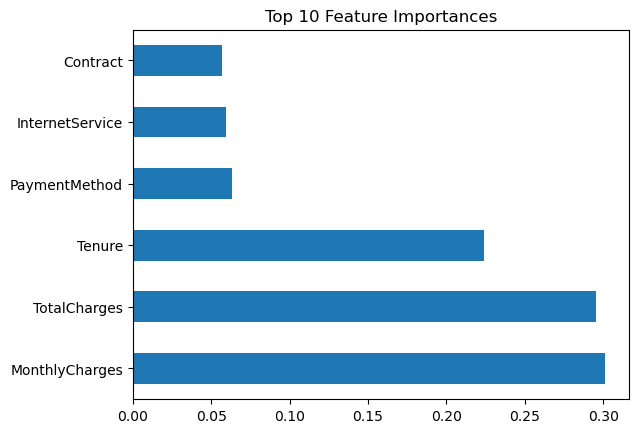

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('customer_churn.csv')

# Display basic dataset information
print(df.info())
print(df.head())

# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split data into features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
